### Alex Stute - Final Project Work

Initial Imports

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os


Loading Data

In [23]:
os.chdir('c:\\Users\\stute\\OneDrive - University of Vermont\\Fall 2024\\Machine Learning\\Final Project Things\\CS5990-Group7-Final-Project')

PATH_TO_TRAINING_DATA = '\\archive\\sign_mnist_train'
PATH_TO_TEST_DATA = '\\archive\\sign_mnist_test'

# Get the training data
os.chdir(os.getcwd() + PATH_TO_TRAINING_DATA)
train_data = pd.read_csv(os.getcwd() + '\\sign_mnist_train.csv')

# Moves up two directories
os.chdir(os.path.dirname(os.getcwd()))
os.chdir(os.path.dirname(os.getcwd()))

# Get the testing data
os.chdir(os.getcwd() + PATH_TO_TEST_DATA)
test_data = pd.read_csv(os.getcwd() + '\\sign_mnist_test.csv')

# Moves up two directories
os.chdir(os.path.dirname(os.getcwd()))
os.chdir(os.path.dirname(os.getcwd()))

train_data_labels = train_data['label']
test_data_labels = test_data['label']

Check data loaded properly

In [10]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


**In the data, label 0 is 'A', label 1 is 'B', etc.**

No J or Z in the dataset

In [11]:
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']

Test printing an image

In [12]:
row_label = train_data.iloc[0][0]
row_pixels = train_data.iloc[0][1:785]

C:\Users\stute\AppData\Local\Temp\ipykernel_42516\3766267553.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row_label = train_data.iloc[0][0]


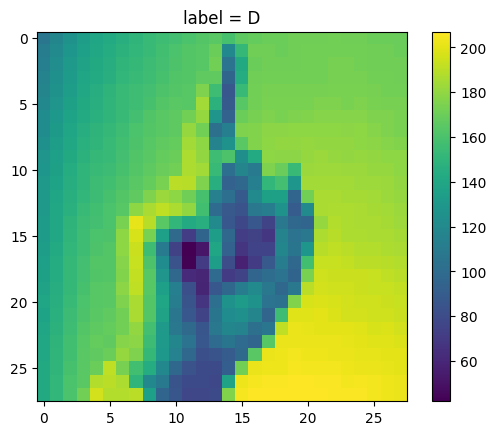

In [19]:
# Images are 28x28, so to view a row, reshape it into a 28x28 array
row_image = np.reshape(row_pixels, (28,28))
plt.imshow(row_image)
plt.title('label = ' + labels[row_label])
plt.colorbar()
plt.savefig('Image_'+'row_id'+'.png')
plt.show()

Keras stuff - CSV

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
model = tf.keras.Sequential([
  layers.Dense(64, activation='relu'),
  layers.Dense(1)
])

model.compile(loss = tf.keras.losses.MeanSquaredError(),
                      optimizer = tf.keras.optimizers.Adam())

In [ ]:
model.fit(train_data, train_data_labels, epochs=20)

Epoch 1/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 4275.0645
Epoch 2/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 119.6299
Epoch 3/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 68.8259
Epoch 4/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 40.4436
Epoch 5/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 45.7921
Epoch 6/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 39.9423
Epoch 7/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 29.0772
Epoch 8/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 22.3791
Epoch 9/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 16.2103
Epoch 10/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 17.7098


Keras stuff - Images

In [14]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [15]:
len(train_data)

27455

In [ ]:
batch_size = 32
img_height = 28
img_width = 28

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [4]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(28, 28, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu')
])

C:\Users\stute\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 28, 28, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        73,856 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97,440 (380.62 KB)

 Trainable params: 97,440 (380.62 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
epochs=10
history = model.fit(
  train_data,
  validation_data=test_data,
  epochs=epochs
)

Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_1/Cast:0", shape=(None, 785), dtype=float32). Expected shape (None, 28, 28, 3), but input has incompatible shape (None, 785)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 785), dtype=int64)
  • training=True
  • mask=None